In [1]:
import pandas as pd
import numpy as np
import gzip
import ast

import string
import itertools
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from keras.preprocessing.text import Tokenizer

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

Using TensorFlow backend.


In [2]:
ITEM_ID = 'asin'
USER_ID = 'reviewerID'
REVIEW_TEXT = 'reviewText'
KEYPHRASE = 'keyVector'

In [3]:
cur_df = pd.read_csv('../data/CDsVinyl/Data.csv')
cur_df[REVIEW_TEXT] = cur_df[REVIEW_TEXT].astype('str')
cur_df[USER_ID] = cur_df[USER_ID].astype('str')
cur_df[ITEM_ID] = cur_df[ITEM_ID].astype('str')
cur_df[KEYPHRASE] = cur_df[KEYPHRASE].apply(lambda key: ast.literal_eval(key))
cur_df

Unnamed: 0      reviewerID        asin  overall  unixReviewTime  \
0                0  A2GANR9I6XHTU9  0780018664      4.0      1169337600   
1                1   ANCOMAI0I7LVG  0780018664      5.0      1213574400   
2                2  A1GGOC9PVDXW7Z  0780018664      5.0      1268524800   
3                3   A62G4QX6XQVLP  0780018664      5.0      1165190400   
4                4  A2ILOYARQVO4K1  0780018664      4.0       989193600   
5                5  A2XKQHB8VCUCJK  0780018664      5.0      1385942400   
6                6    AIMR915K4YCN  0780018664      5.0      1083196800   
7                7  A1GHUN5HXMHZ89  0780018664      5.0      1300406400   
8                8  A2C7BOQVFH1HLE  0780018664      4.0      1302825600   
9                9  A25FDX17O3QKLT  0780018664      5.0      1115769600   
10              10  A29ND8RD38SEUZ  0780018664      5.0      1358899200   
11              11  A16CZRQL23NOIW  0780018664      5.0      1135123200   
12              12  A2BLITJITO97N5  0780018664      5.0      1102636800   
13              13  A366S12KCZ280V  0780018664      5.0      1376524800   
14              14   AS0IKFFQS2HD2  0780018664      5.0      1217894400   
15              15  A1UI2N2LBGVKC7  0780018664      5.0       944697600   
16              16  A34D06JL7LC6MU  0780018664      4.0      1159574400   
17              17  A2D9IEFJGB483Q  0780018664      5.0      1016496000   
18              18  A2NJO6YE954DBH  0780018664      5.0      1099094400   
19              19  A25KKXUQQ0OLWB  0780018664      5.0      1254355200   
20              20  A1D2AXVN20OQZD  0780018664      5.0      1111795200   
21              21  A3QLAOOTFEHCJI  0780018664      4.0      1316304000   
22              22  A1VXN0LM7NUQ3L  0780018664      5.0      1156982400   
23              23   AMKZHBOK7VMQR  0780018664      5.0      1351468800   
24              24  A2R1HAXRNU0QX7  0780018664      5.0      1326672000   
25              25  A2EDZH51XHFA9B  0780018664      4.0      1072051200   
26              26  A18I75O0V5RAH8  0780018664      5.0       968803200   
27              27  A1WYIDGR8ZG21X  0780018664      5.0      1098921600   
28              28  A18758S1PUYIDT  0780018664      5.0      1267401600   
29              29  A3EFQNLPCV5XNV  0780607287      5.0      1367366400   
...            ...             ...         ...      ...             ...   
182473      182473   A9Q28YTLYREO7  B00JDB4PLM      4.0      1402358400   
182474      182474  A24N1BAS3CU27H  B00JDB4PLM      4.0      1402358400   
182475      182475  A27D6RT8D7AMPW  B00JDB4PLM      5.0      1403913600   
182476      182476  A2KUXPRQMR2OET  B00JDB4PLM      5.0      1402876800   
182477      182477  A3KJ6JAZPH382D  B00JDB4PLM      3.0      1405728000   
182478      182478   AHBXZ9O7AL74G  B00JXETVRC      5.0      1404950400   
182479      182479  A2A6S9FGQIX5JK  B00JXETVRC      4.0      1405987200   
182480      182480  A3O2ZA4F8E8OFD  B00JXETVRC      3.0      1404864000   
182481      182481  A3E4FVGQ7TMMUL  B00JXETVRC      4.0      1404864000   
182482      182482  A34IBXM7E8CPWE  B00JXETVRC      5.0      1405900800   
182483      182483  A20DZX38KRBIT8  B00JXETVRC      5.0      1405900800   
182484      182484  A3U7247JF0L52E  B00JXETVRC      5.0      1404950400   
182485      182485  A1650I94SH53EH  B00JXETVRC      5.0      1404864000   
182486      182486   AGS0UHWMBLX24  B00JXETVRC      5.0      1405814400   
182487      182487  A1NF9WS7RR82MX  B00JXETVRC      4.0      1404777600   
182488      182488  A2PJBX24OT9534  B00JXETVRC      4.0      1405468800   
182489      182489  A15YPJLKLZS0MK  B00JXETVRC      3.0      1404950400   
182490      182490  A3BXZ1EXCSCCSY  B00JXETVRC      5.0      1404777600   
182491      182491   AY6VLDGM9D9PP  B00JXETVRC      4.0      1405209600   
182492      182492  A1432KCCCZL550  B00JXETVRC      3.0      1405987200   
182493      182493  A1A63EDKHNUFAO  B00JXETVRC      5.0      1405468800   
182494      182494   AIDFLFUKJ657

In [4]:
keyphrase_index_list = cur_df[KEYPHRASE].values
keyphrase_index_flatten_list = [item for sublist in keyphrase_index_list for item in sublist]
keyphrase_index_flatten_list

[12,
 12,
 12,
 33,
 5,
 12,
 30,
 29,
 30,
 12,
 37,
 12,
 29,
 12,
 17,
 12,
 29,
 11,
 29,
 12,
 5,
 12,
 12,
 18,
 17,
 12,
 12,
 12,
 5,
 12,
 5,
 5,
 12,
 5,
 12,
 5,
 12,
 5,
 12,
 30,
 12,
 11,
 20,
 37,
 11,
 17,
 29,
 4,
 17,
 29,
 34,
 20,
 37,
 30,
 37,
 12,
 12,
 5,
 11,
 17,
 5,
 12,
 17,
 29,
 28,
 12,
 22,
 30,
 1,
 17,
 22,
 22,
 12,
 12,
 11,
 5,
 11,
 22,
 30,
 37,
 30,
 37,
 5,
 13,
 22,
 29,
 30,
 12,
 1,
 8,
 23,
 21,
 23,
 1,
 5,
 8,
 20,
 23,
 23,
 1,
 23,
 1,
 5,
 11,
 17,
 20,
 23,
 27,
 39,
 1,
 11,
 22,
 23,
 23,
 38,
 1,
 20,
 23,
 5,
 21,
 1,
 23,
 38,
 11,
 23,
 20,
 1,
 20,
 29,
 23,
 23,
 21,
 1,
 18,
 22,
 1,
 23,
 29,
 1,
 1,
 12,
 18,
 23,
 25,
 37,
 38,
 39,
 1,
 4,
 12,
 20,
 23,
 38,
 39,
 20,
 1,
 18,
 23,
 11,
 1,
 3,
 5,
 6,
 11,
 16,
 20,
 23,
 31,
 1,
 11,
 18,
 20,
 23,
 5,
 18,
 22,
 0,
 5,
 18,
 4,
 18,
 22,
 27,
 38,
 18,
 5,
 18,
 18,
 18,
 11,
 18,
 22,
 29,
 2,
 18,
 2,
 5,
 22,
 5,
 22,
 22,
 1,
 5,
 23,
 23,
 21,
 23,
 1,
 2,
 20,
 2

In [5]:
keyphrase_count = pd.DataFrame.from_dict({'keyphrase': keyphrase_index_flatten_list, 
                        'count': np.ones(len(keyphrase_index_flatten_list))}).groupby(['keyphrase'])['count'].sum().to_frame().reset_index().sort_values('count', ascending=False)
keyphrase_count = keyphrase_count.reset_index(drop=True).reset_index()

In [6]:
keyphrase_count['count'] = keyphrase_count['count'] / len(cur_df)
keyphrase_count

index  keyphrase     count
0       0          1  0.340208
1       1          5  0.196972
2       2         12  0.126529
3       3          3  0.124749
4       4         38  0.116957
5       5          2  0.104119
6       6         20  0.101412
7       7         39  0.091456
8       8         21  0.091368
9       9         18  0.072585
10     10          4  0.064010
11     11          6  0.047413
12     12         30  0.047205
13     13         27  0.046690
14     14         28  0.042903
15     15         11  0.041736
16     16         13  0.041462
17     17          9  0.041090
18     18          0  0.041051
19     19         23  0.038290
20     20         25  0.029731
21     21         17  0.029419
22     22         19  0.027035
23     23         33  0.026772
24     24         34  0.023172
25     25          8  0.017233
26     26         29  0.016981
27     27         36  0.014876
28     28         14  0.014800
29     29         37  0.014652
30     30         31  0.013342
31     31         16  0.012159
32     32         24  0.010564
33     33         26  0.009485
34     34          7  0.008170
35     35         35  0.008164
36     36         22  0.007781
37     37         15  0.006942
38     38         32  0.006477
39     39         10  0.006427

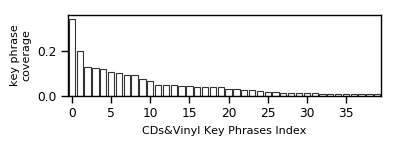

In [7]:
# fig9 = plt.figure(figsize=(3, 3), dpi=100)
# ax9 = fig9.add_subplot(111)

# plt.rcParams["axes.labelsize"] = 8
sns.set_context("paper", rc={"font.size":8,"axes.titlesize":8,"axes.labelsize":8})  

fig, ax = plt.subplots(figsize=(4, 1.5), dpi=100)
ax = sns.barplot(x="index", y='count', data=keyphrase_count, color="white", edgecolor=".2")

# vals = ax.get_yticks()
# ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

# ax.set_xlim(0,40)
# ax.set_ylim(0,0.4)

import matplotlib.ticker as ticker
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
# ax.set_xlim(1,40)
# ax.set_xticks(range(1,40,5))

ax.set_xlabel("CDs&Vinyl Key Phrases Index")
ax.set_ylabel("key phrase\ncoverage")
# legend = plt.legend(loc='upper right', shadow=True, fontsize=10)
# legend = plt.legend(shadow=True, fontsize=10)
handles, labels = ax.get_legend_handles_labels()
plt.tight_layout()
fig_path = '../figs'
name = 'CDsVinyl_keyphrase_coverage'
fig.savefig('{0}/{1}.pdf'.format(fig_path, name), bbox_inches="tight", pad_inches=0, format='pdf')

# Beer Dataset

In [8]:
train_df = pd.read_csv('../data/beer/Train.csv')
valid_df = pd.read_csv('../data/beer/Valid.csv')
test_df = pd.read_csv('../data/beer/Test.csv')

cur_df = train_df.append(valid_df).append(test_df)

cur_df['review/text'] = cur_df['review/text'].astype('str')
cur_df[KEYPHRASE] = cur_df[KEYPHRASE].apply(lambda key: ast.literal_eval(key))
cur_df

/home/kai/.local/lib/python3.6/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


Binary  ItemIndex  Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1  \
0            0        659           0             0               0   
1            0        659           1             1               1   
2            0        659           2             2               2   
3            1        659           3             3               3   
4            1        659           4             4               4   
5            0        659           5             5               5   
6            0        659           6             6               6   
7            0        659           7             7               7   
8            0        659           8             8               8   
9            1        659           9             9               9   
10           1        659          10            10              10   
11           0        659          11            11              11   
12           0        659          12            12              12   
13           0        659          13            13              13   
14           0        659          14            14              14   
15           0        659          15            15              15   
16           0        659          16            16              16   
17           0        659          17            17              17   
18           0        659          18            18              18   
19           0        659          19            19              19   
20           1        659          20            20              20   
21           1        659          21            21              21   
22           1        659          22            22              22   
23           1        659          23            23              23   
24           0        659          24            24              24   
25           0        659          25            25              25   
26           1        659          26            26              26   
27           0        659          27            27              27   
28           0        659          28            28              28   
29           0        659          29            29              29   
...        ...        ...         ...           ...             ...   
200516       0        486        6367        987738          987738   
200517       1       1537        6367        423249          423249   
200518       0       2744        6368        372925          372925   
200519       0       3542        6368        885415          885415   
200520       0       1394        6368        865977          865977   
200521       0        186        6368        919201          919201   
200522       0        323        6368        964420          964420   
200523       0       2039        6368        903943          903943   
200524       0        486        6368        987735          987735   
200525       0       2125        6368        518167          518167   
200526       1        226        6368        611118          611118   
200527       0       1056        6368        699302          699302   
200528       1        742        6368        178741          178741   
200529       0       1360        6368        889863          889863   
200530       0        542        6368         72617           72617   
200531       0        543        6369        469368          469368   
200532       0       2953        6369        866826          866826   
200533       0       3165        6369        275850          275850   
200534       1       3143        6369        638321          638321   
200535       1       3621        6369        239736          239736   
200536       0       2567        6369        743682          743682   
200537       0       1881        6369        737585          737585   
200538       1       2701        6369        226790          226790   
200539       0        322        6369        902516          902516   
200540       0       2755       

In [9]:
keyphrase_index_list = cur_df[KEYPHRASE].values
keyphrase_index_flatten_list = [item for sublist in keyphrase_index_list for item in sublist]
keyphrase_index_flatten_list

[1,
 7,
 12,
 14,
 16,
 29,
 31,
 34,
 39,
 40,
 42,
 45,
 1,
 16,
 18,
 20,
 24,
 39,
 42,
 43,
 45,
 55,
 12,
 36,
 39,
 42,
 12,
 42,
 1,
 5,
 7,
 12,
 14,
 16,
 18,
 19,
 26,
 31,
 34,
 40,
 42,
 45,
 51,
 55,
 68,
 74,
 10,
 12,
 16,
 31,
 36,
 42,
 39,
 0,
 1,
 3,
 12,
 14,
 16,
 18,
 19,
 34,
 39,
 43,
 3,
 10,
 16,
 18,
 26,
 36,
 43,
 51,
 1,
 9,
 14,
 20,
 32,
 36,
 42,
 43,
 45,
 55,
 1,
 7,
 12,
 14,
 16,
 19,
 31,
 34,
 36,
 39,
 41,
 43,
 45,
 61,
 1,
 7,
 14,
 29,
 34,
 45,
 1,
 12,
 39,
 42,
 45,
 2,
 4,
 16,
 21,
 26,
 39,
 42,
 45,
 1,
 5,
 12,
 26,
 39,
 40,
 45,
 51,
 5,
 12,
 14,
 16,
 34,
 40,
 42,
 11,
 12,
 16,
 31,
 45,
 2,
 7,
 12,
 16,
 31,
 36,
 37,
 45,
 55,
 1,
 7,
 12,
 14,
 16,
 19,
 31,
 34,
 39,
 41,
 7,
 16,
 30,
 42,
 45,
 1,
 2,
 4,
 5,
 10,
 12,
 16,
 18,
 19,
 21,
 26,
 29,
 36,
 42,
 45,
 52,
 55,
 1,
 2,
 11,
 12,
 14,
 16,
 21,
 26,
 31,
 34,
 39,
 40,
 45,
 55,
 68,
 2,
 4,
 12,
 14,
 18,
 21,
 34,
 36,
 39,
 40,
 41,
 45,
 51,
 1,
 10,
 12,
 

In [10]:
keyphrase_count = pd.DataFrame.from_dict({'keyphrase': keyphrase_index_flatten_list, 
                        'count': np.ones(len(keyphrase_index_flatten_list))}).groupby(['keyphrase'])['count'].sum().to_frame().reset_index().sort_values('count', ascending=False)
keyphrase_count = keyphrase_count.reset_index(drop=True).reset_index()

In [11]:
keyphrase_count['count'] = keyphrase_count['count'] / len(cur_df)
keyphrase_count

index  keyphrase     count
0       0          1  0.518861
1       1         16  0.382189
2       2         14  0.346644
3       3         44  0.284832
4       4         43  0.267823
5       5          2  0.242308
6       6         55  0.240657
7       7         42  0.234892
8       8         12  0.209686
9       9         21  0.209655
10     10         39  0.193996
11     11         45  0.191016
12     12          6  0.181942
13     13          0  0.177250
14     14         50  0.159302
15     15         11  0.139109
16     16         58  0.129599
17     17          8  0.128382
18     18          5  0.120619
19     19         36  0.112525
20     20         18  0.108168
21     21         41  0.105070
22     22         10  0.101456
23     23         24  0.098842
24     24         51  0.094556
25     25         47  0.093330
26     26         30  0.084419
27     27         31  0.083280
28     28          4  0.082850
29     29         40  0.081573
..    ...        ...       ...
45     45         71  0.049351
46     46         60  0.046636
47     47         52  0.043042
48     48          7  0.041710
49     49         64  0.041489
50     50         17  0.041040
51     51         32  0.040759
52     52         23  0.040381
53     53         28  0.033097
54     54         27  0.032806
55     55         29  0.032497
56     56         15  0.032441
57     57          3  0.031940
58     58         35  0.031567
59     59         63  0.030558
60     60         66  0.025641
61     61         53  0.024757
62     62         46  0.023504
63     63         72  0.022928
64     64         59  0.022266
65     65         69  0.022240
66     66         48  0.019786
67     67         54  0.019748
68     68         73  0.019584
69     69         33  0.017726
70     70         25  0.015151
71     71         70  0.013361
72     72         37  0.011451
73     73         57  0.011126
74     74         49  0.009906

[75 rows x 3 columns]

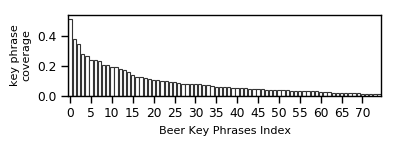

In [18]:
# fig9 = plt.figure(figsize=(3, 3), dpi=100)
# ax9 = fig9.add_subplot(111)

sns.set_context("paper", rc={"font.size":8,"axes.titlesize":8,"axes.labelsize":8})  

fig, ax = plt.subplots(figsize=(4, 1.5), dpi=100)
ax = sns.barplot(x="index", y='count', data=keyphrase_count, color="white", edgecolor=".2")

# vals = ax.get_yticks()
# ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

# ax.set_xlim(0,75)
# ax.set_ylim(0,0.55)

import matplotlib.ticker as ticker
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())

ax.set_xlabel("Beer Key Phrases Index")
ax.set_ylabel("key phrase\ncoverage")
# legend = plt.legend(loc='upper right', shadow=True, fontsize=10)
# legend = plt.legend(shadow=True, fontsize=10)
handles, labels = ax.get_legend_handles_labels()
plt.tight_layout()
fig_path = '../figs'
name = 'beer_keyphrase_coverage'
fig.savefig('{0}/{1}.pdf'.format(fig_path, name), bbox_inches="tight", pad_inches=0, format='pdf')